In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd
# import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
# import statistical tools
from scipy import stats
# import data wrangle functions
import wrangle_austin_shelter as w

In [2]:
animals, train, validate, test = w.wrangle_austin_animal_shelter()

reading intake data from local file
reading outcome data from local file


In [3]:
train.shape

(107839, 28)

In [4]:
animals.head()

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,has_name,intake_type_encoded,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded
0,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,...,False,4,14,1,0,1127,213,2,0,19
1,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,...,False,4,14,1,0,1127,213,2,0,19
2,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,...,True,4,10,1,0,1122,7,0,3,10
3,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,...,True,4,10,1,0,1122,7,0,3,10
4,A665763,2013-10-22 15:10:00,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White,...,False,4,10,2,1,640,467,0,2,16


In [5]:
animals.shape

(192572, 28)

In [6]:
animals.columns

Index(['animal_id', 'datetime_in', 'found_location', 'intake_type',
       'intake_condition', 'animal_type', 'sex_upon_intake', 'age_upon_intake',
       'breed', 'color', 'name', 'datetime_out', 'date_of_birth',
       'outcome_type', 'sex_upon_outcome', 'age_upon_outcome',
       'outcome_subtype', 'outcome', 'has_name', 'intake_type_encoded',
       'intake_condition_encoded', 'animal_type_encoded',
       'sex_upon_intake_encoded', 'breed_encoded', 'color_encoded',
       'outcome_encoded', 'sex_upon_outcome_encoded',
       'outcome_subtype_encoded'],
      dtype='object')

In [7]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192572 entries, 0 to 192679
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   animal_id                 192572 non-null  object        
 1   datetime_in               192572 non-null  datetime64[ns]
 2   found_location            192572 non-null  object        
 3   intake_type               192572 non-null  object        
 4   intake_condition          192572 non-null  object        
 5   animal_type               192572 non-null  object        
 6   sex_upon_intake           192572 non-null  object        
 7   age_upon_intake           192572 non-null  object        
 8   breed                     192572 non-null  object        
 9   color                     192572 non-null  object        
 10  name                      192572 non-null  object        
 11  datetime_out              192572 non-null  datetime64[ns]
 12  da

In [8]:
animals.datetime_in.min(), animals.datetime_in.max()

(Timestamp('2013-10-01 07:51:00'), Timestamp('2023-04-27 13:19:00'))

In [9]:
animals.isna().sum()

animal_id                   0
datetime_in                 0
found_location              0
intake_type                 0
intake_condition            0
animal_type                 0
sex_upon_intake             0
age_upon_intake             0
breed                       0
color                       0
name                        0
datetime_out                0
date_of_birth               0
outcome_type                0
sex_upon_outcome            0
age_upon_outcome            0
outcome_subtype             0
outcome                     0
has_name                    0
intake_type_encoded         0
intake_condition_encoded    0
animal_type_encoded         0
sex_upon_intake_encoded     0
breed_encoded               0
color_encoded               0
outcome_encoded             0
sex_upon_outcome_encoded    0
outcome_subtype_encoded     0
dtype: int64

In [10]:
animals[animals.sex_upon_intake.isna() == True]

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,has_name,intake_type_encoded,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded


#### one of the na values of the sex_upon_intake is a Test, since there is only 1 other it won't make much difference to drop that row

In [11]:
animals = animals[animals.sex_upon_intake.isna() == False]

In [12]:
animals.isna().sum()

animal_id                   0
datetime_in                 0
found_location              0
intake_type                 0
intake_condition            0
animal_type                 0
sex_upon_intake             0
age_upon_intake             0
breed                       0
color                       0
name                        0
datetime_out                0
date_of_birth               0
outcome_type                0
sex_upon_outcome            0
age_upon_outcome            0
outcome_subtype             0
outcome                     0
has_name                    0
intake_type_encoded         0
intake_condition_encoded    0
animal_type_encoded         0
sex_upon_intake_encoded     0
breed_encoded               0
color_encoded               0
outcome_encoded             0
sex_upon_outcome_encoded    0
outcome_subtype_encoded     0
dtype: int64

In [13]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47073
Return to Owner    40141
Euthanasia         10078
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [14]:
animals[animals.outcome_type.isna() == True].sort_values('animal_id')

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,has_name,intake_type_encoded,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded


In [15]:
train.intake_type.value_counts()

Stray                 69987
Owner Surrender       25723
Public Assist          8114
Wildlife               3179
Abandoned               666
Euthanasia Request      170
Name: intake_type, dtype: int64

In [16]:
animals.animal_type.value_counts()

Dog          120926
Cat           62761
Other          8072
Bird            784
Livestock        29
Name: animal_type, dtype: int64

In [17]:
animals[(animals.animal_type == 'Other') & (animals.intake_type != 'Wildlife')]

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,has_name,intake_type_encoded,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded
328,A665986,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Male,1 year,Californian Mix,White/Black,...,True,2,10,4,1,662,518,2,1,19
480,A663373,2013-10-19 11:16:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 months,Rabbit Sh Mix,White/Tan,...,True,2,10,4,4,2101,559,2,4,19
481,A663373,2013-10-19 11:16:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 months,Rabbit Sh Mix,White/Tan,...,True,2,10,4,4,2101,559,2,4,19
522,A665985,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Female,1 year,Californian Mix,White/Black,...,True,2,10,4,0,662,518,2,0,19
523,A665985,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Female,1 year,Californian Mix,White/Black,...,True,2,10,4,0,662,518,2,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192484,A813101,2020-02-04 11:47:00,Travis (TX),Owner Surrender,Normal,Other,Intact Male,5 years,Tortoise,Brown/Tan,...,True,2,10,4,1,2409,198,2,1,19
192509,A847452,2021-12-02 12:46:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 days,Guinea Pig,Tricolor,...,False,2,10,4,4,1406,495,2,4,19
192551,A868861,2022-11-09 15:55:00,N Lamar Boulevard And Thurmond Street in Aust...,Stray,Sick,Other,Unknown,3 months,Guinea Pig,Tricolor/Black,...,True,4,14,4,4,1406,496,2,4,19
192589,A820843,2020-07-30 13:07:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,1 year,Guinea Pig,Brown/White,...,True,2,10,4,4,1406,200,0,4,10


In [18]:
animals[(animals.animal_type == 'Other')
        & (animals.intake_type != 'Wildlife')].outcome_type.value_counts()

Transfer           1037
Adoption            851
Euthanasia          322
Return to Owner      70
Died                 66
Disposal             58
Missing               4
Rto-Adopt             1
Relocate              1
Name: outcome_type, dtype: int64

In [19]:
animals[(animals.animal_type == 'Other')
        & (animals.intake_type != 'Wildlife')].breed.value_counts()

Guinea Pig          431
Rabbit Sh Mix       350
Rabbit Sh           239
Guinea Pig Mix      160
Bat Mix             142
                   ... 
Cinnamon              1
Polish Mix            1
Beveren Mix           1
Angora-Satin Mix      1
Chinchilla-Amer       1
Name: breed, Length: 118, dtype: int64

In [20]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47073
Return to Owner    40141
Euthanasia         10078
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [21]:
animals.animal_type.value_counts()

Dog          120926
Cat           62761
Other          8072
Bird            784
Livestock        29
Name: animal_type, dtype: int64

In [22]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47073
Return to Owner    40141
Euthanasia         10078
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [23]:
animals[animals.outcome_type == 'Adoption'].outcome_subtype.value_counts()

None       74290
Foster     16202
Offsite      603
Barn           2
Name: outcome_subtype, dtype: int64

In [24]:
# added this to the preparation step

# animals['outcome'] = np.where(animals.outcome_type == 'Adoption', 'adopted',
#                           np.where(animals.outcome_type == 'Return to Owner', 'returned',
#                           np.where(animals.outcome_type == 'Transfer', 'transfered',
#                           np.where(animals.outcome_type == 'Euthanasia', 'death',
#                           np.where(animals.outcome_type == 'Rto-Adopt', 'returned',
#                           np.where(animals.outcome_type == 'Died', 'death',
#                           np.where(animals.outcome_type == 'Disposal', 'death',
#                           np.where(animals.outcome_type == 'Missing', 'unknown',
#                           np.where(animals.outcome_type == 'Stolen', 'unknown',
#                           np.where(animals.outcome_type == 'Relocate', 'transfered',
#                           np.where(animals.outcome_type.isnull() == True, 'unknown', ''
#                                   )))))))))))

In [25]:
animals[animals.outcome == '']

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,has_name,intake_type_encoded,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded


In [26]:
lil_bit = animals[animals.animal_id == 'A721033']

In [27]:
lil_bit

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,has_name,intake_type_encoded,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded
11057,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16
11058,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16
11059,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16
11060,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16
11061,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12172,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16
12173,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16
12174,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16
12175,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,True,3,10,2,2,2113,501,0,2,16


In [28]:
lil_bit.groupby('datetime_in').datetime_out.count()

datetime_in
2016-02-20 10:44:00    32
2016-07-10 11:53:00    32
2016-09-03 14:30:00    32
2016-10-20 22:47:00    32
2016-12-15 10:07:00    32
2017-01-09 14:26:00    32
2017-01-26 06:55:00    32
2017-01-30 23:05:00    64
2017-02-06 10:13:00    32
2018-03-07 08:27:00    32
2018-03-14 10:57:00    32
2018-04-05 17:59:00    32
2018-04-12 10:14:00    64
2018-05-22 13:48:00    32
2018-08-06 19:00:00    64
2018-08-18 21:45:00    32
2018-09-21 15:01:00    32
2018-09-24 19:44:00    32
2018-11-19 19:53:00    32
2018-12-17 16:52:00    64
2019-02-12 10:21:00    64
2019-02-16 10:30:00    32
2019-02-24 21:53:00    32
2019-03-07 12:02:00    32
2019-04-26 10:28:00    64
2019-08-05 10:52:00    32
2019-09-16 14:06:00    64
2019-10-05 12:31:00    32
Name: datetime_out, dtype: int64

In [29]:
animals.head()

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,has_name,intake_type_encoded,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded
0,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,...,False,4,14,1,0,1127,213,2,0,19
1,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,...,False,4,14,1,0,1127,213,2,0,19
2,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,...,True,4,10,1,0,1122,7,0,3,10
3,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,...,True,4,10,1,0,1122,7,0,3,10
4,A665763,2013-10-22 15:10:00,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White,...,False,4,10,2,1,640,467,0,2,16


In [30]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192572 entries, 0 to 192679
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   animal_id                 192572 non-null  object        
 1   datetime_in               192572 non-null  datetime64[ns]
 2   found_location            192572 non-null  object        
 3   intake_type               192572 non-null  object        
 4   intake_condition          192572 non-null  object        
 5   animal_type               192572 non-null  object        
 6   sex_upon_intake           192572 non-null  object        
 7   age_upon_intake           192572 non-null  object        
 8   breed                     192572 non-null  object        
 9   color                     192572 non-null  object        
 10  name                      192572 non-null  object        
 11  datetime_out              192572 non-null  datetime64[ns]
 12  da

In [31]:
train.columns.to_list()

['animal_id',
 'datetime_in',
 'found_location',
 'intake_type',
 'intake_condition',
 'animal_type',
 'sex_upon_intake',
 'age_upon_intake',
 'breed',
 'color',
 'name',
 'datetime_out',
 'date_of_birth',
 'outcome_type',
 'sex_upon_outcome',
 'age_upon_outcome',
 'outcome_subtype',
 'outcome',
 'has_name',
 'intake_type_encoded',
 'intake_condition_encoded',
 'animal_type_encoded',
 'sex_upon_intake_encoded',
 'breed_encoded',
 'color_encoded',
 'outcome_encoded',
 'sex_upon_outcome_encoded',
 'outcome_subtype_encoded']

In [32]:
animals.intake_type.value_counts()

Stray                 125083
Owner Surrender        45743
Public Assist          14472
Wildlife                5785
Abandoned               1184
Euthanasia Request       305
Name: intake_type, dtype: int64

In [33]:
animals.sex_upon_intake.value_counts()

Intact Male      58008
Intact Female    53250
Neutered Male    38958
Spayed Female    30578
Unknown          11778
Name: sex_upon_intake, dtype: int64

In [34]:
animals.intake_condition.value_counts()

Normal        169127
Injured         9917
Sick            7072
Nursing         4027
Neonatal         740
Aged             580
Other            372
Medical          317
Feral            151
Pregnant         126
Behavior         101
Med Attn          26
Med Urgent         6
Unknown            4
Space              3
Neurologic         2
Agonal             1
Name: intake_condition, dtype: int64

# Univariate

In [35]:
cols = ['intake_type',
 'intake_condition',
 'animal_type',
 'sex_upon_intake',
 'age_upon_intake',
 'breed',
 'color',
 'date_of_birth',
 'outcome_type',
 'sex_upon_outcome',
 'age_upon_outcome',
 'outcome_subtype',
 'outcome']

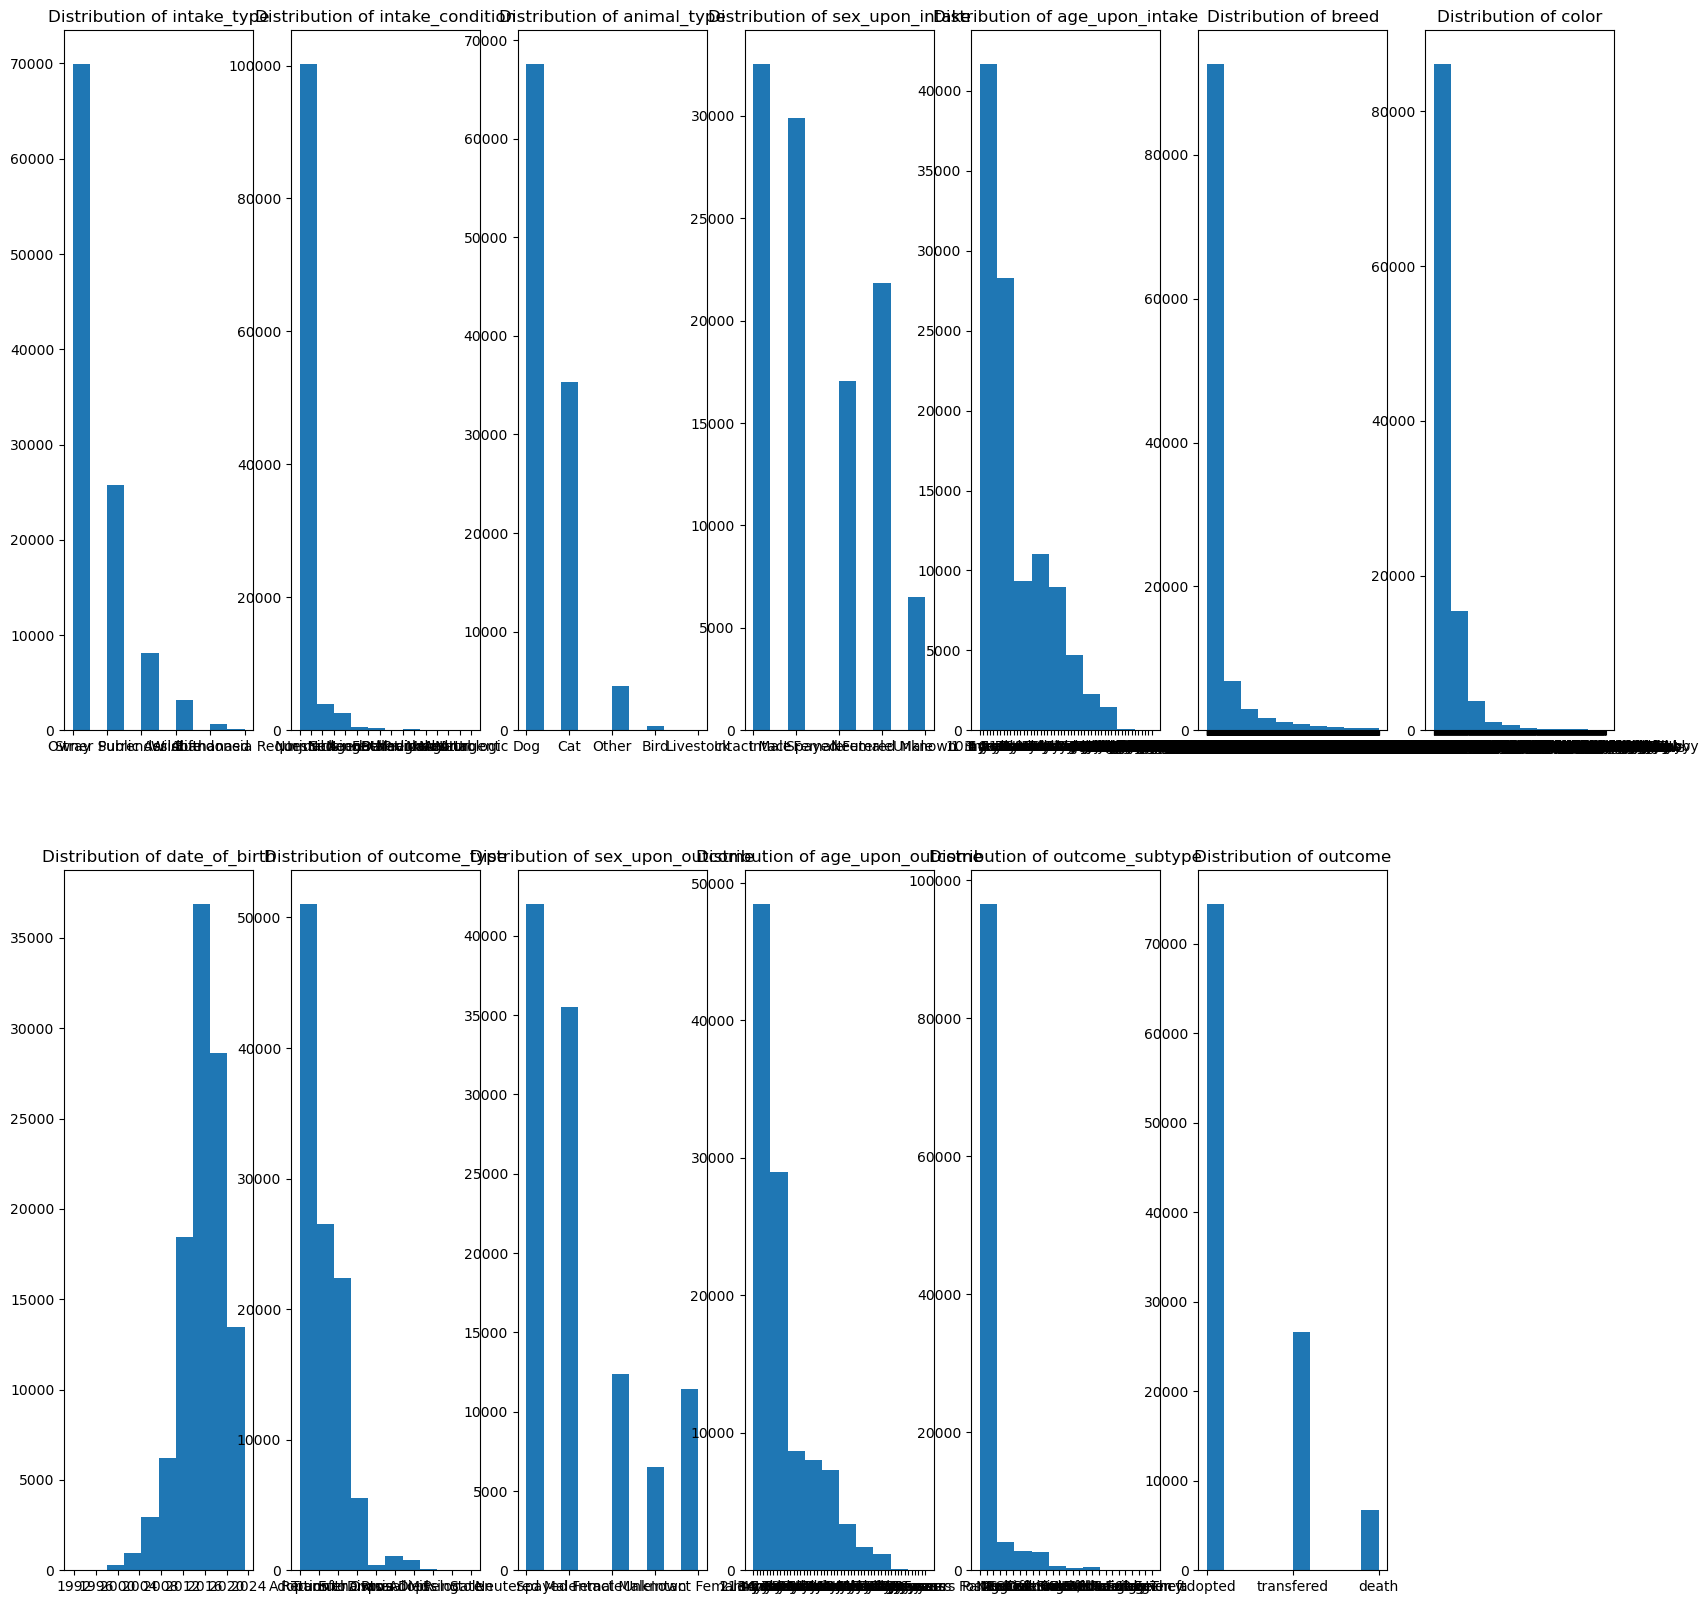

In [36]:
# cols = df.columns.to_list()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(2, round(len(cols) /2) +1, plot_number)
    plt.title(f'Distribution of {col}')
    train[col].hist(bins=10)
    plt.grid(False)
plt.show()

<AxesSubplot:>

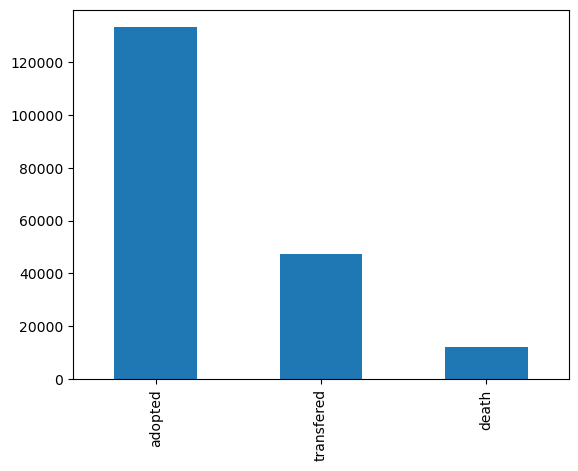

In [37]:
animals.outcome.value_counts().plot.bar()

### The age upon intake seems to be right skewed. Animal type could probably be put into 3 groups. Might be able to put color into 4-5 bins. intake condition could be 4-5 bins

In [38]:
box_cols= [
 'intake_type_encoded',
 'intake_condition_encoded',
 'animal_type_encoded',
 'sex_upon_intake_encoded',
 'breed_encoded',
 'color_encoded',
 'outcome_encoded',
 'sex_upon_outcome_encoded',
 'outcome_subtype_encoded']

In [39]:
# plt.figure(figsize=(20,10))
# for i, col in enumerate(box_cols):
#     # our plot numbers start at 1
#     plot_number = i+1
#     plt.subplot(2, round(len(cols) /2), plot_number)
#     plt.title(f'Distribution of {col}')
#     plt.grid(False)
#     sns.boxplot(data=train[col])
# plt.show()

# Bivariate Analysis

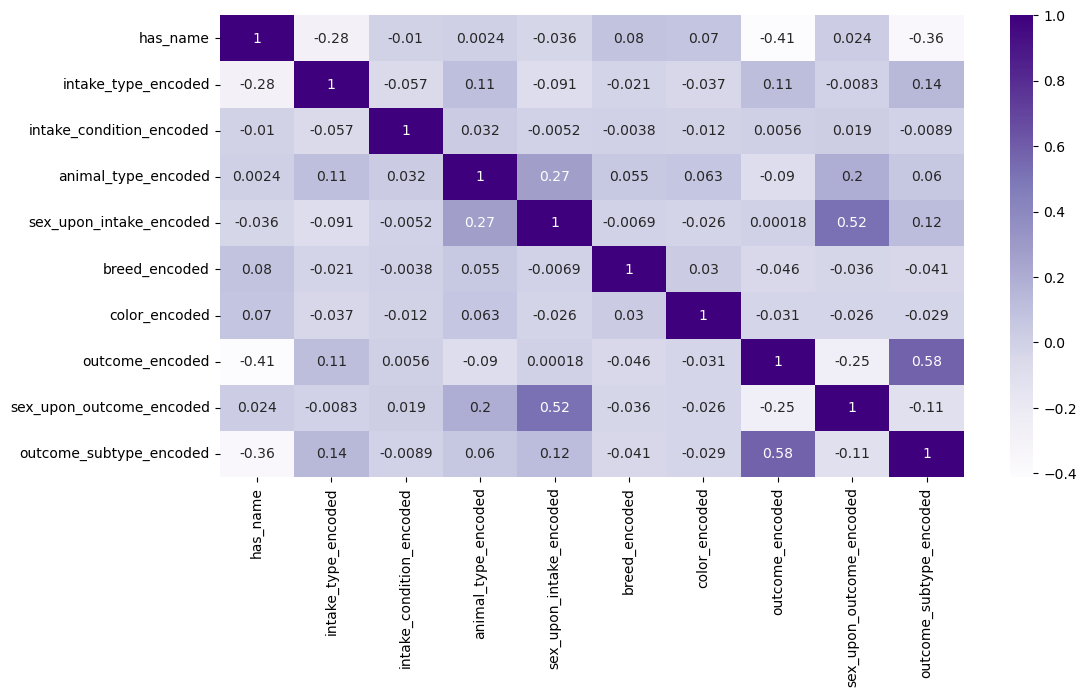

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='Purples', annot=True)
plt.show()

In [41]:
def get_pairplot(df):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    sample = df.sample(500)
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    plt.show()

<Figure size 2000x2000 with 0 Axes>

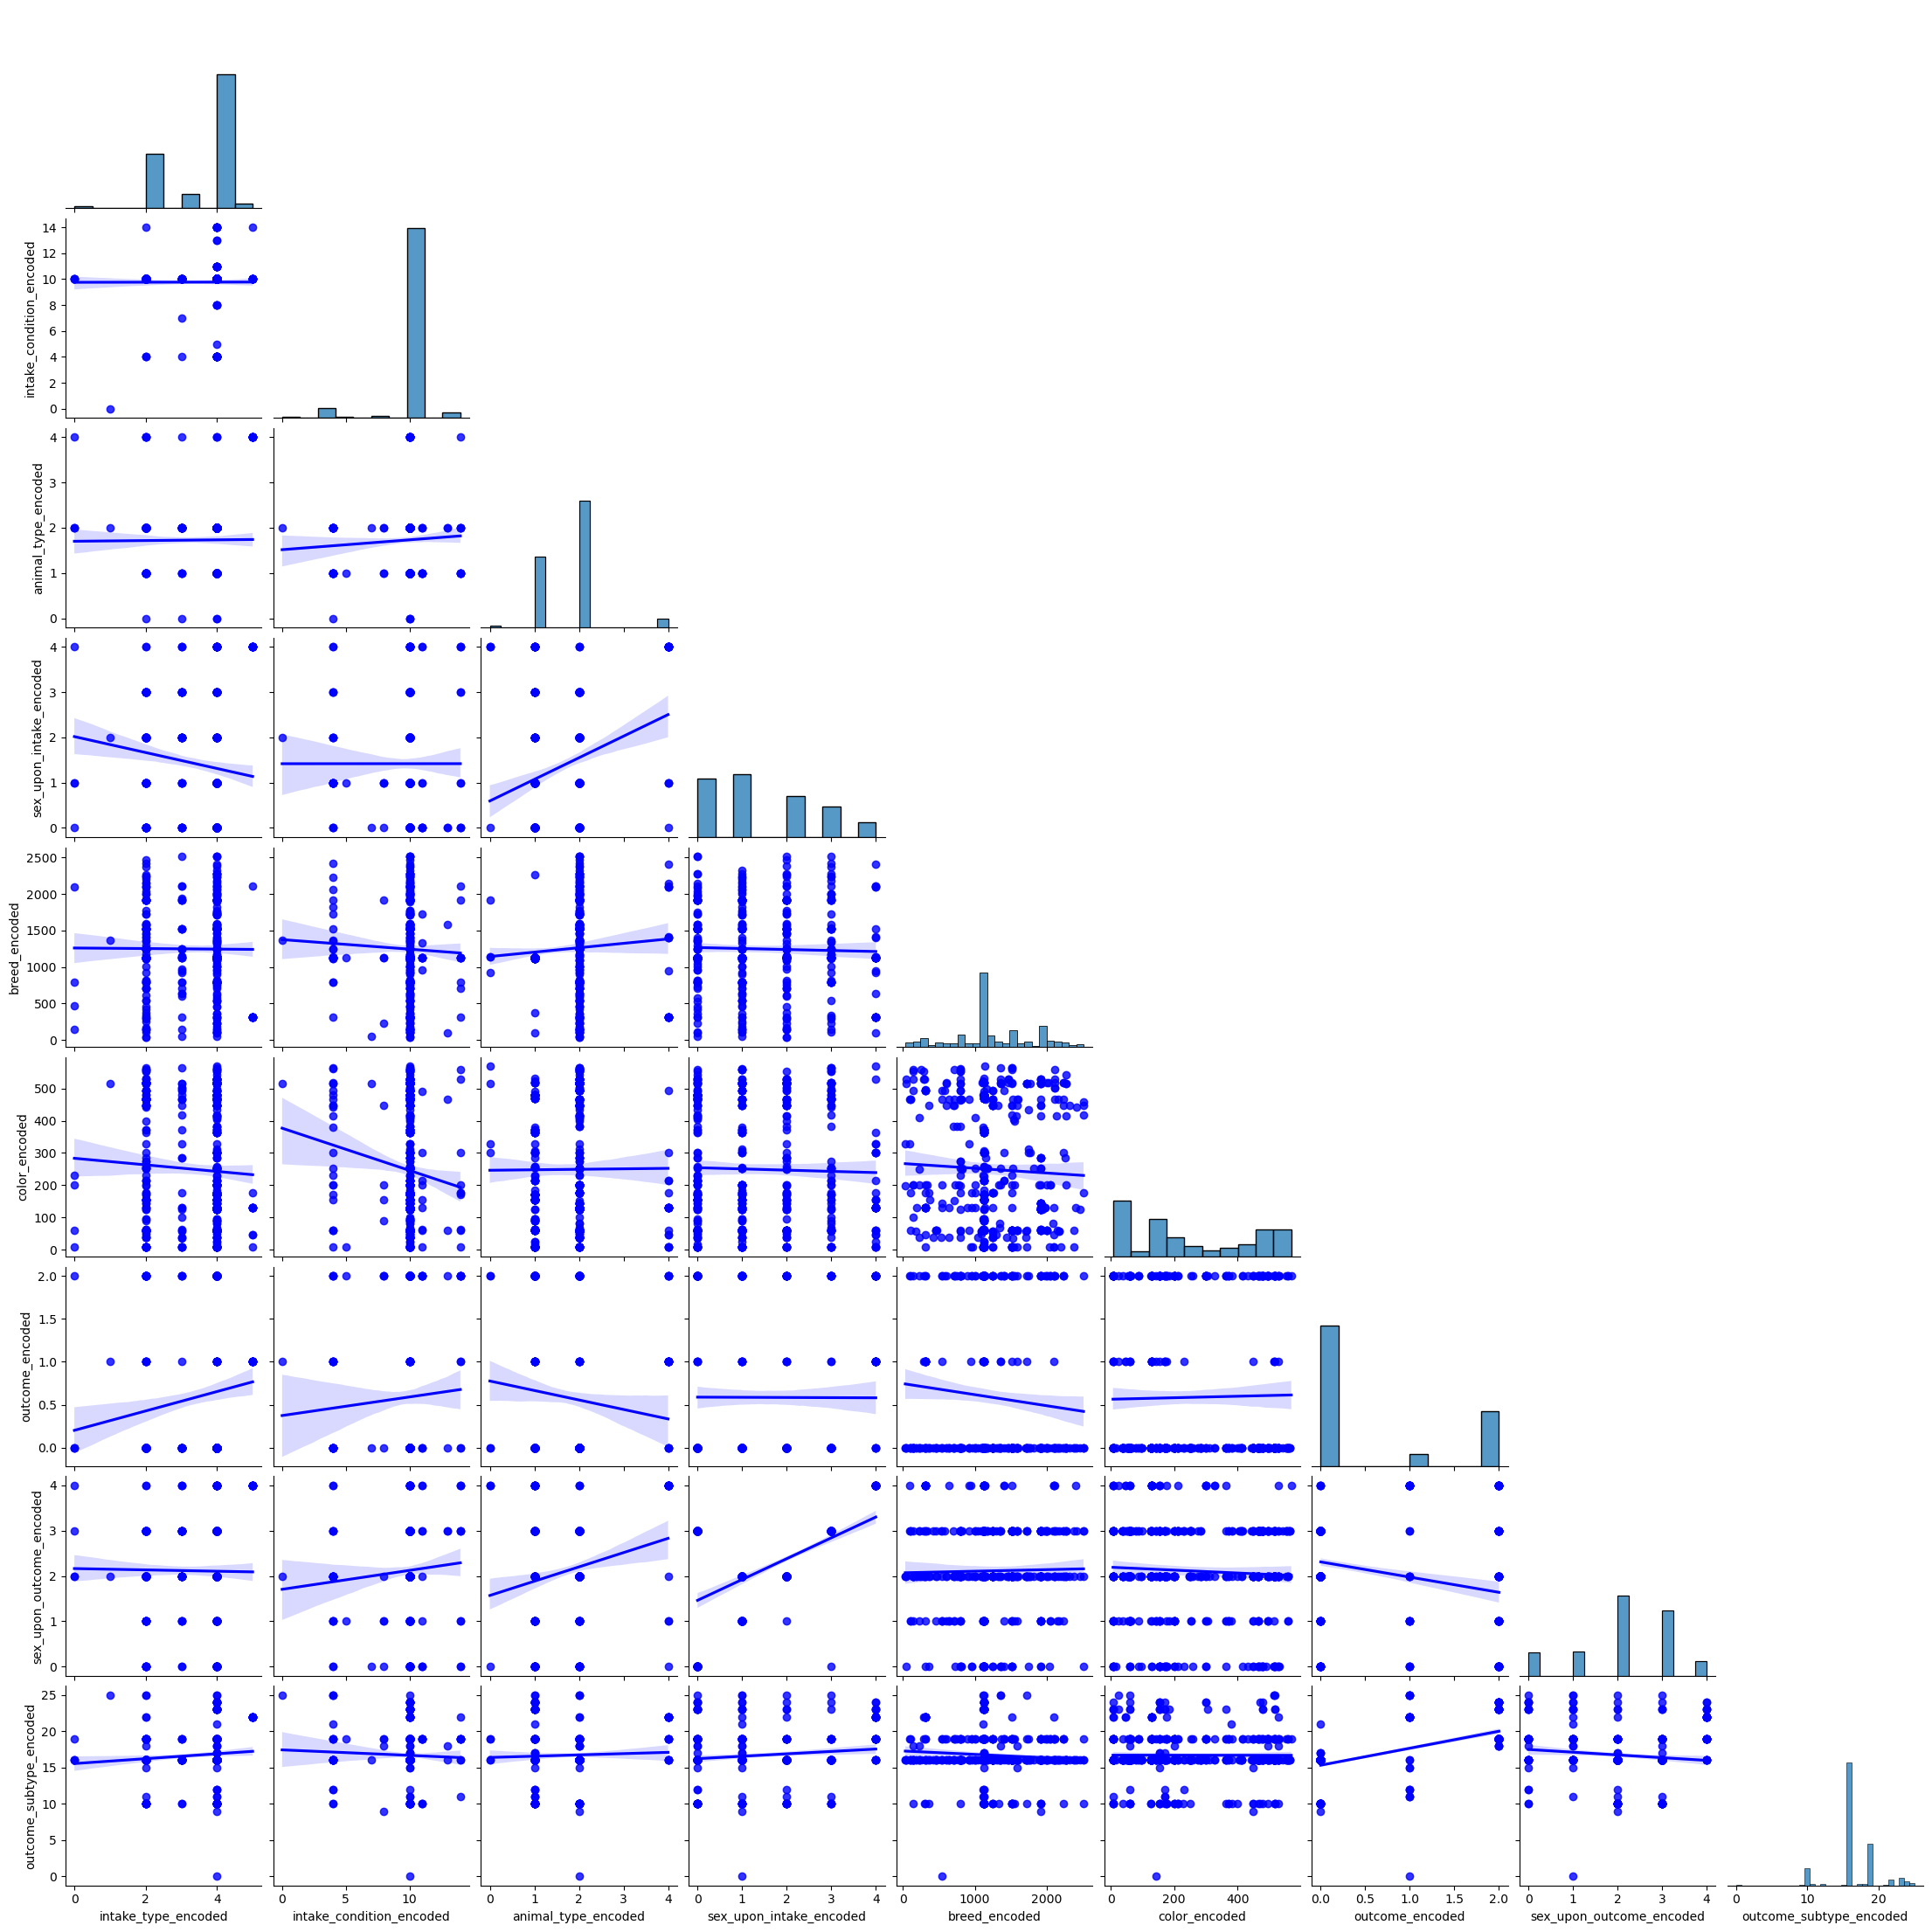

In [42]:
get_pairplot(train[box_cols])

### It looks like there might be some correlations to outcome with has_name, sex_upon_outcome, intake_type and animal_type

In [43]:
deaths = animals[animals.outcome == 'death']

In [44]:
deaths = deaths.set_index('datetime_out')

In [45]:
deaths[deaths.intake_type != 'Wildlife'].intake_condition.value_counts()

Normal        3261
Injured       1843
Sick          1086
Nursing        165
Aged            79
Other           30
Neonatal        17
Medical         16
Behavior        12
Feral            9
Pregnant         7
Med Urgent       3
Med Attn         2
Agonal           1
Name: intake_condition, dtype: int64

In [46]:
deaths[deaths.intake_type == 'Wildlife'].intake_condition.value_counts()

Normal      2968
Sick        1634
Injured     1017
Nursing       51
Neonatal      10
Medical        3
Other          2
Feral          1
Unknown        1
Name: intake_condition, dtype: int64

In [47]:
def get_plot_deaths_by_year(train):
    deaths = train[train.outcome == 'death']
    deaths = deaths.set_index('datetime_out')
    deaths.resample('Y').animal_id.count().plot()
    plt.title('Deaths by Year', size=16)
    plt.xlabel('Year', size=15)
    plt.ylabel('Number of Animal Deaths in Shelter', size=15)
    plt.show()

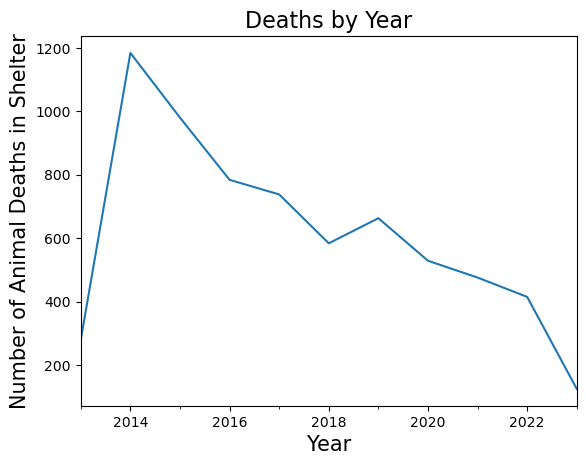

In [48]:
get_plot_deaths_by_year(train)

### The number of deaths per year appears to be going down

In [49]:
animals[animals.intake_type == 'Wildlife']

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,has_name,intake_type_encoded,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded
12,A666101,2013-10-26 18:33:00,Payne in Austin (TX),Wildlife,Injured,Other,Unknown,0 years,Squirrel Mix,Gray/Brown,...,False,5,4,4,4,2338,311,1,4,16
13,A664830,2013-10-09 15:34:00,15043 Savannah Heights in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Brown/Black,...,False,5,14,4,4,2105,176,1,4,25
24,A665706,2013-10-21 18:06:00,43 Rainey St in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,...,False,5,10,4,4,312,129,1,4,16
84,A665188,2013-10-14 22:25:00,2207 Pasadena Dr in Austin (TX),Wildlife,Normal,Other,Unknown,4 weeks,Bat,Brown/Black,...,False,5,10,4,4,311,176,1,4,22
91,A664579,2013-10-05 14:55:00,8425 Adirondack Trail in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Raccoon Mix,Black/White,...,False,5,14,4,4,2105,59,1,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192491,A776787,2018-07-19 09:09:00,2300 Townes Ln in Austin (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Gray/Black,...,False,5,14,4,4,2105,308,1,4,25
192511,A753119,2017-07-02 07:40:00,13408 Fitzhugh Rd in Austin (TX),Wildlife,Sick,Other,Unknown,5 months,Raccoon,Brown,...,False,5,14,4,4,2104,129,1,4,22
192559,A766079,2018-02-01 12:02:00,Willamette Dr in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Raccoon Mix,Black/Gray,...,False,5,14,4,4,2105,47,1,4,15
192575,A807634,2019-10-27 16:21:00,430 Ridgewood in Austin (TX),Wildlife,Injured,Other,Unknown,3 years,Bat,Brown,...,False,5,4,4,4,311,129,1,4,16


In [50]:
animals[animals.intake_type == 'Wildlife'].outcome_type.value_counts()

Euthanasia         5095
Disposal            453
Died                139
Transfer             71
Relocate             15
Adoption              8
Missing               2
Return to Owner       2
Name: outcome_type, dtype: int64

In [51]:
((72 + 14 + 7 + 4) / 5789) * 100

1.6755916393159442

In [52]:
wildlife = animals[animals.intake_type == 'Wildlife']

In [60]:
def get_plot_wildlife_deaths(animals):
    wildlife = animals[animals.intake_type == 'Wildlife']
    sns.histplot(data = wildlife, x='outcome')
    plt.title('Outcomes for Wildlife', size =18)
    plt.xlabel('Outcome of Trip to Animal Shelter', size= 16)
    plt.ylabel('Number of Animals', size=16)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

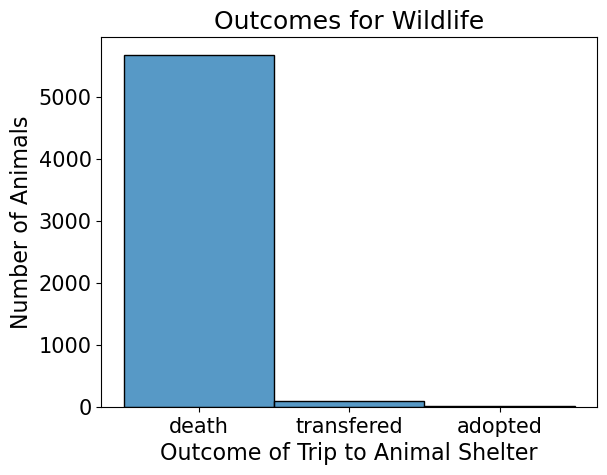

In [61]:
get_plot_wildlife_deaths(animals)

#### Looks like things don't turn out very well for wildlife that gets sent to the animal shelter, only 1.68 % survive a trip to the animal shelter

In [56]:
dogs = animals[animals.animal_type == 'Dog']
cats = animals[animals.animal_type == 'Cat']
other_animals = animals[(animals.animal_type == 'Other') | (animals.animal_type == 'Bird')
                        | (animals.animal_type == 'Livestock')]

In [57]:
dogs.outcome_type.value_counts()

Adoption           58120
Return to Owner    36789
Transfer           21570
Euthanasia          2295
Rto-Adopt           1637
Died                 366
Disposal              72
Missing               67
Stolen                10
Name: outcome_type, dtype: int64

In [58]:
dogs.intake_type.value_counts()

Stray                 77435
Owner Surrender       30226
Public Assist         12390
Abandoned               667
Euthanasia Request      208
Name: intake_type, dtype: int64

#### 77,000 stray dogs taken in, thats a lot

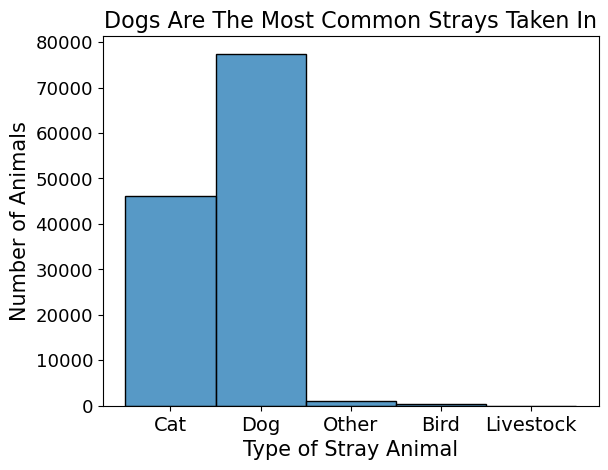

In [59]:
sns.histplot(data=animals[animals.intake_type == 'Stray'], x='animal_type')
plt.title('Dogs Are The Most Common Strays Taken In', size=16)
plt.xlabel('Type of Stray Animal', size=15)
plt.ylabel('Number of Animals', size=15)
plt.xticks( size=14)
plt.yticks(size=13)
plt.show()

### Lets check out the relationship between having a name and outcome

In [64]:
named = train[train.has_name == True]
unnamed = train[train.has_name == False]

In [251]:
def get_plot_named_vs_unnamed(train):
    named = train[train.has_name == True].sort_values('outcome')
    unnamed = train[train.has_name == False].sort_values('outcome')
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    sns.histplot(data = named, x='outcome')
    plt.title('Named Animal Outcomes', size =18)
    plt.xlabel('Outcome of Trip to Animal Shelter', size= 16, loc='right')
    plt.ylabel('Number of Animals', size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.subplot(1,2,2)
    sns.histplot(data = unnamed, x='outcome')
    plt.title('Unnamed Animal Outcomes', size =18)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

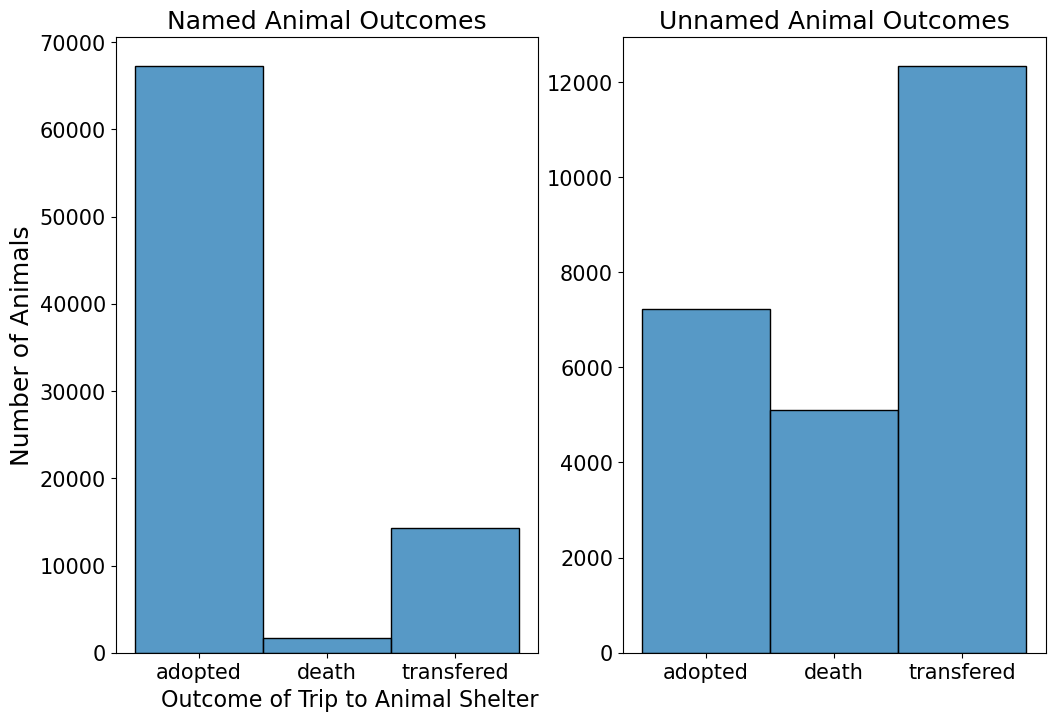

In [252]:
get_plot_named_vs_unnamed(train)

### Lets do a statistical test on named / outcome
- H$_0$: The outcome distributions are the same for named and unnamed animals
- H$_a$: The outcome distributions are different for named and unnamed animals
- α = 0.05
- This will be a categorical / categorical test, which will be a chi-squared test

In [74]:
observed = pd.crosstab(train['has_name'], train['outcome'])
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [80]:
def check_chi2_hypothesis(data, x, y, α=0.05):
    '''
    This function will check the provided x and y variables from the 
    provided dataset (data) for statistical relevence according 
    to a pearsonsr test (this is changable by entering the desired test as a kwarg)
    '''
    # run the requested statistical test on variables x and y from data
    observed = pd.crosstab(data[x], data[y])
    chi2, p, _, hypothetical = stats.chi2_contingency(observed)
    # if the resulting p-value is less than alpha, then reject the null hypothesis
    if p < α:
        # print results rejecting null hypothesis
        print(f"Since the p-value is less than {α}, \n\
we can reject the null hypothesis and conclude that {x} and {y} are correlated.")
        print(f"The correlation coefficient between \
{x} and {y} is {chi2:.2f} with a p-value of {p:.4f}")
        print('_______________________________________________________')
    # if p-value >= alpha, then we fail to reject the null hypothesis
    else:
        # print the results failing to reject the null hypothesis
        print(f"Since the p-value is greater than or equal to {α}, \n\
we fail to reject the null hypothesis and conclude \n\
that there is insufficient evidence to suggest a correlation between {x} and {y}.")
        print('_______________________________________________________')

In [81]:
check_chi2_hypothesis(train, 'has_name', 'outcome')

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that has_name and outcome are correlated.
The correlation coefficient between has_name and outcome is 26273.22 with a p-value of 0.0000
_______________________________________________________


#### We can conclude that having a name does have an effect on the outcome of the animal's trip to the animal shelter

### Are there higher amounts of intakes on different days?

In [100]:
intakes = train.set_index('datetime_in')
train['intake_day'] = intakes.index.day_name()

<AxesSubplot:xlabel='intake_day'>

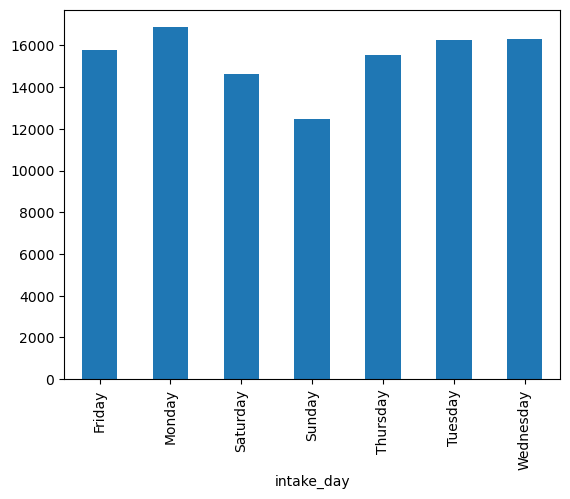

In [105]:
train.groupby('intake_day').animal_id.count().plot.bar()

In [219]:
intakes_day = train.groupby('intake_day').animal_id.count()

In [217]:
intakes_day

intake_day
Friday       15775
Monday       16872
Saturday     14615
Sunday       12457
Thursday     15545
Tuesday      16265
Wednesday    16310
Name: animal_id, dtype: int64

In [305]:
train['outcome_day'] = train.datetime_out.dt.day_name()
train['weekday_num'] = train.datetime_out.dt.day_of_week

In [315]:
train.head()

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded,intake_day,outcome_day,weekday_num
110679,A733324,2016-08-20 12:30:00,11752 Von Quintus Dr in Austin (TX),Stray,Normal,Dog,Intact Male,1 month,Rat Terrier Mix,Black/White,...,2,1,2113,59,0,2,10,Saturday,Tuesday,1
77632,A706156,2015-06-25 15:15:00,Farm To Market 620 N & Hudson Bend Rd in Austi...,Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,...,1,1,1127,171,2,2,19,Thursday,Thursday,3
176479,A852394,2022-03-02 12:56:00,1156 West Cesar Chavez Street in Austin (TX),Stray,Normal,Cat,Intact Female,10 months,Domestic Shorthair,Tortie,...,1,0,1126,480,2,3,19,Wednesday,Tuesday,1
80305,A703780,2015-05-28 18:01:00,1200 Mearns Meadow Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Chihuahua Shorthair/Dachshund,Black/Tan,...,2,0,818,56,0,3,16,Thursday,Monday,0
121037,A779201,2018-08-27 12:52:00,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Black,...,1,3,1127,7,0,3,16,Monday,Sunday,6


In [330]:
train.groupby('outcome_day').count().sort_values('weekday_num')

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,outcome_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded,intake_day,weekday_num
outcome_day,,,,,,,,,,,,,,,,,,,,,
Thursday,14063,14063,14063,14063,14063,14063,14063,14063,14063,14063,...,14063,14063,14063,14063,14063,14063,14063,14063,14063,14063
Wednesday,14504,14504,14504,14504,14504,14504,14504,14504,14504,14504,...,14504,14504,14504,14504,14504,14504,14504,14504,14504,14504
Sunday,14902,14902,14902,14902,14902,14902,14902,14902,14902,14902,...,14902,14902,14902,14902,14902,14902,14902,14902,14902,14902
Friday,15102,15102,15102,15102,15102,15102,15102,15102,15102,15102,...,15102,15102,15102,15102,15102,15102,15102,15102,15102,15102
Monday,15318,15318,15318,15318,15318,15318,15318,15318,15318,15318,...,15318,15318,15318,15318,15318,15318,15318,15318,15318,15318
Tuesday,16721,16721,16721,16721,16721,16721,16721,16721,16721,16721,...,16721,16721,16721,16721,16721,16721,16721,16721,16721,16721
Saturday,17229,17229,17229,17229,17229,17229,17229,17229,17229,17229,...,17229,17229,17229,17229,17229,17229,17229,17229,17229,17229


In [304]:
outcome_days['weekday_number'] = outcome_days.index.day_of_week

AttributeError: 'DataFrame' object has no attribute 'dt'

In [289]:
def get_plot_outcomes_by_day(train):
    train.groupby('outcome_day').outcome.value_counts().unstack().plot.area()
    plt.title('Outcome Types by Day of Week', size=20)
    plt.xlabel('Day of Week', size=16)
    plt.ylabel('Number of Animal Outcomes', size=16)
    plt.show()

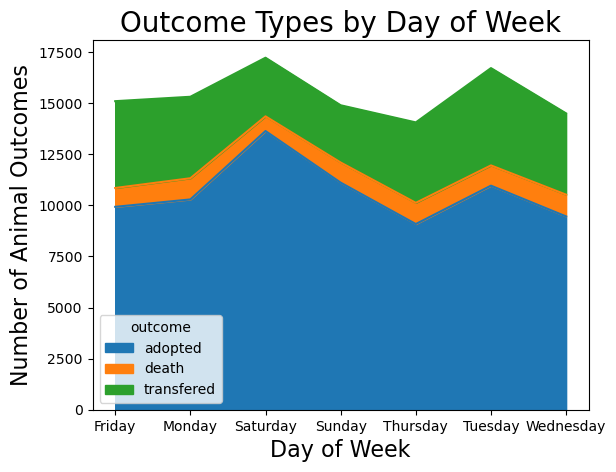

In [290]:
get_plot_outcomes_by_day(train)

<AxesSubplot:xlabel='outcome_day,outcome'>

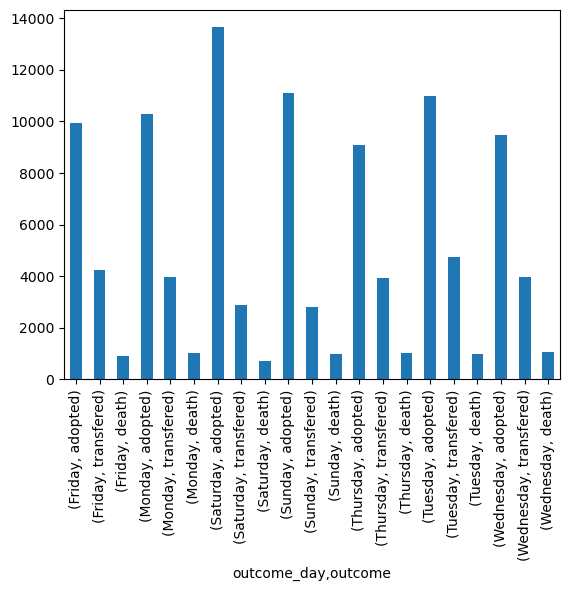

In [256]:
train.groupby('outcome_day').outcome.value_counts().plot.bar()

<AxesSubplot:xlabel='outcome_day'>

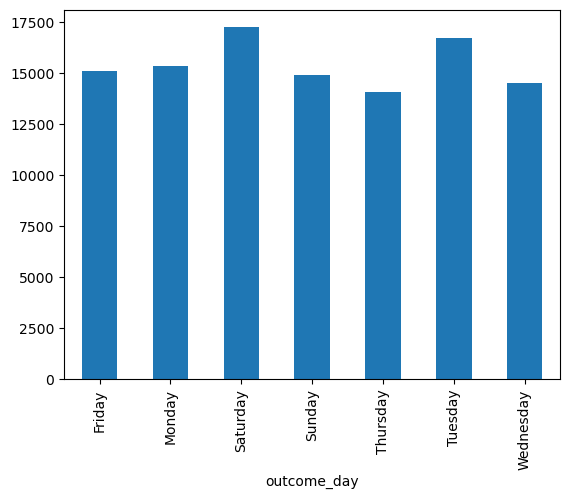

In [183]:
train.groupby('outcome_day').outcome.count().plot.bar(stacked=True)


In [129]:
intakes.groupby('intake_type').resample('D').animal_id.count()

intake_type  datetime_in
Abandoned    2020-01-08     2
             2020-01-09     0
             2020-01-10     0
             2020-01-11     0
             2020-01-12     0
                           ..
Wildlife     2023-04-20     1
             2023-04-21     0
             2023-04-22     0
             2023-04-23     0
             2023-04-24     1
Name: animal_id, Length: 18193, dtype: int64

In [131]:
intakes.groupby('intake_type').resample('M').size().unstack(0).apply(
    lambda row: row / row.sum() ,axis=1)

intake_type,Abandoned,Euthanasia Request,Owner Surrender,Public Assist,Stray,Wildlife
datetime_in,,,,,,
2013-10-31,NaN,0.004975,0.184790,0.051173,0.724947,0.034115
2013-11-30,NaN,0.002270,0.213394,0.040863,0.720772,0.022701
2013-12-31,NaN,0.009324,0.233100,0.086247,0.614219,0.057110
2014-01-31,NaN,0.004619,0.250577,0.078522,0.640878,0.025404
2014-02-28,NaN,0.004667,0.254376,0.084014,0.609102,0.047841
...,...,...,...,...,...,...
2022-12-31,0.026749,NaN,0.259259,0.094650,0.594650,0.024691
2023-01-31,0.029183,NaN,0.274319,0.038911,0.628405,0.029183
2023-02-28,0.058427,NaN,0.229213,0.058427,0.635955,0.017978


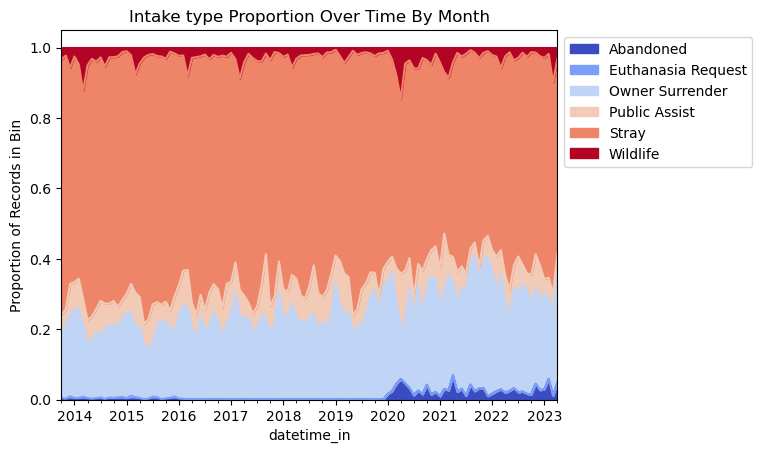

In [291]:
ax = intakes.groupby('intake_type').resample('M').size().unstack(0).apply(
    lambda row: row / row.sum() ,axis=1).plot.area(
    title='Intake type Proportion Over Time By Month',
    ylabel='Proportion of Records in Bin',
    colormap='coolwarm'
)
ax.legend(
         bbox_to_anchor=(1,1))

In [135]:
outcomes = train.set_index('datetime_out')

In [146]:
outcomes.columns

Index(['animal_id', 'datetime_in', 'found_location', 'intake_type',
       'intake_condition', 'animal_type', 'sex_upon_intake', 'age_upon_intake',
       'breed', 'color', 'name', 'date_of_birth', 'outcome_type',
       'sex_upon_outcome', 'age_upon_outcome', 'outcome_subtype', 'outcome',
       'has_name', 'intake_type_encoded', 'intake_condition_encoded',
       'animal_type_encoded', 'sex_upon_intake_encoded', 'breed_encoded',
       'color_encoded', 'outcome_encoded', 'sex_upon_outcome_encoded',
       'outcome_subtype_encoded', 'intake_day', 'outcome_day'],
      dtype='object')

<AxesSubplot:xlabel='datetime_out'>

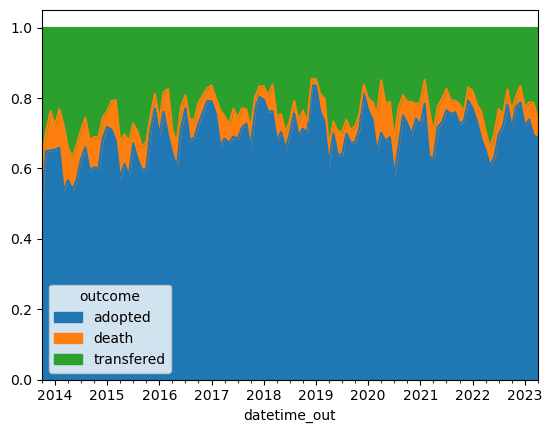

In [213]:
outcomes.groupby('outcome').resample('M').size().T.apply(
    lambda row: row / row.sum(), axis=1).plot.area()

In [210]:
outcomes.groupby('outcome').resample('Y').size().unstack(1)

datetime_out  outcome   
2013-12-31    adopted        1699
              death           280
              transfered      844
2014-12-31    adopted        7670
              death          1184
              transfered     3776
2015-12-31    adopted        8563
              death           980
              transfered     3665
2016-12-31    adopted        9305
              death           784
              transfered     3020
2017-12-31    adopted        9579
              death           738
              transfered     3068
2018-12-31    adopted        9381
              death           584
              transfered     2912
2019-12-31    adopted       10154
              death           663
              transfered     3668
2020-12-31    adopted        4880
              death           529
              transfered     1509
2021-12-31    adopted        6210
              death           476
              transfered     1775
2022-12-31    adopted        5626
              death    

In [204]:
outcomes.groupby('outcome_type').resample('Y').size().unstack(0).apply(
    lambda row: row / row.sum() ,axis=1)

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Stolen,Transfer
datetime_out,,,,,,,,,,
2013-12-31,0.384697,0.002834,0.002125,0.094226,0.000354,NaN,0.217145,NaN,NaN,0.298618
2014-12-31,0.391924,0.005305,0.004909,0.083531,0.000158,0.000158,0.215360,NaN,NaN,0.298654
2015-12-31,0.403165,0.008480,0.001136,0.064582,0.000909,0.000076,0.245154,NaN,NaN,0.276499
2016-12-31,0.457777,0.008010,0.003051,0.048745,0.001144,0.000229,0.252041,NaN,NaN,0.229003
2017-12-31,0.461113,0.007097,0.002914,0.045125,0.000523,0.000075,0.244602,0.009936,NaN,0.228614
2018-12-31,0.473092,0.007843,0.002485,0.035024,0.000466,0.000078,0.238099,0.017318,NaN,0.225596
2019-12-31,0.484915,0.008423,0.004004,0.033345,0.001036,0.000000,0.197446,0.018640,NaN,0.252192
2020-12-31,0.512287,0.008673,0.008095,0.059699,0.000289,0.000000,0.169991,0.023128,NaN,0.217838
2021-12-31,0.597093,0.006855,0.005673,0.043730,0.000591,0.000355,0.123035,0.013828,NaN,0.208841


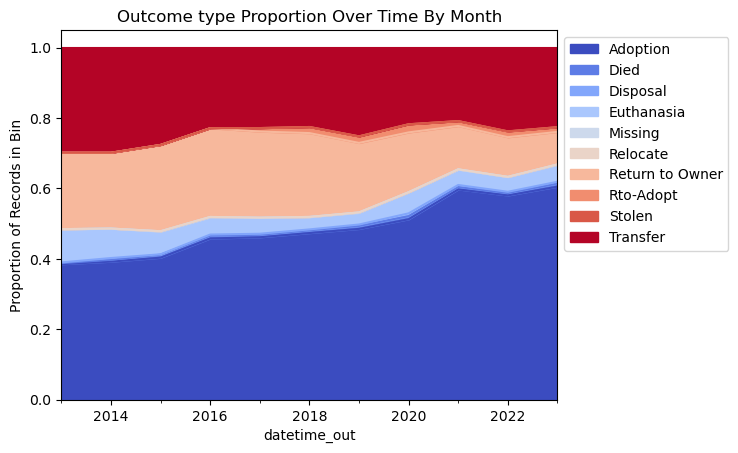

In [186]:
ax = outcomes.groupby('outcome_type').resample('Y').size().unstack(0).apply(
    lambda row: row / row.sum() ,axis=1).plot.area(
    title='Outcome type Proportion Over Time By Month',
    ylabel='Proportion of Records in Bin',
    colormap='coolwarm'
)
ax.legend(
         bbox_to_anchor=(1,1))